In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### <b>Goal #1:</b> Your employer, a privately owned used car sales company, wants to optimize inventory and pricing strategies. They want to use in-house and  out-house data to build models that can accurately predict prices and  quantifies the impact of relevant variables on the price.
 
### <b>Goal #2:</b> This will be the first modeling project of many so keep proper documentation for future reference. This data is in-house data that your boss wants to use as a test run. The employer is also developing a team of senior data scientists to collect and store more data that we should be able to use for modeling. 

### <b>Goal #3:</b> Additionally, the stakeholders have requested a dashboard that can display information that may be useful in making future purchases. 

In [117]:
cwd = os.getcwd()
data_import = pd.read_csv(cwd + "\Car_Price_Pred.csv")
data_import.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,ohcv,six,152,mpfi,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,four,109,mpfi,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,five,136,mpfi,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000


In [118]:
raw_data = data_import.copy()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [172]:
numeric_df = raw_data.select_dtypes(include=['int', 'float']).copy()

print(numeric_df.shape)


numeric_df.head()

(205, 16)


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.600000,168.800000,64.100000,48.800000,2548,130,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000
1,2,3,88.600000,168.800000,64.100000,48.800000,2548,130,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000
2,3,1,94.500000,171.200000,65.500000,52.400000,2823,152,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000
3,4,2,99.800000,176.600000,66.200000,54.300000,2337,109,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000
4,5,2,99.400000,176.600000,66.400000,54.300000,2824,136,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000


In [120]:
numeric_df.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [121]:
numeric_df = numeric_df[['price','carlength', 'carwidth', 'carheight', 'curbweight', 
                         'enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 
                         'peakrpm', 'citympg', 'highwaympg', 'wheelbase', 'car_ID']].copy()

In [122]:
corr_mat = numeric_df.corr()
corr_mat

,price,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,wheelbase,car_ID
price,1.000000,0.682920,0.759325,0.119336,0.835305,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599,0.577816,-0.109093
carlength,0.682920,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.874587,0.170636
carwidth,0.759325,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.795144,0.052387
carheight,0.119336,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.589435,0.255960
curbweight,0.835305,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.776386,0.071962
enginesize,0.874145,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.569329,-0.033930
boreratio,0.553173,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.488750,0.260064
stroke,0.079443,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.160959,-0.160824
compressionratio,0.067984,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.249786,0.150276
horsepower,0.808139,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.353294,-0.015006


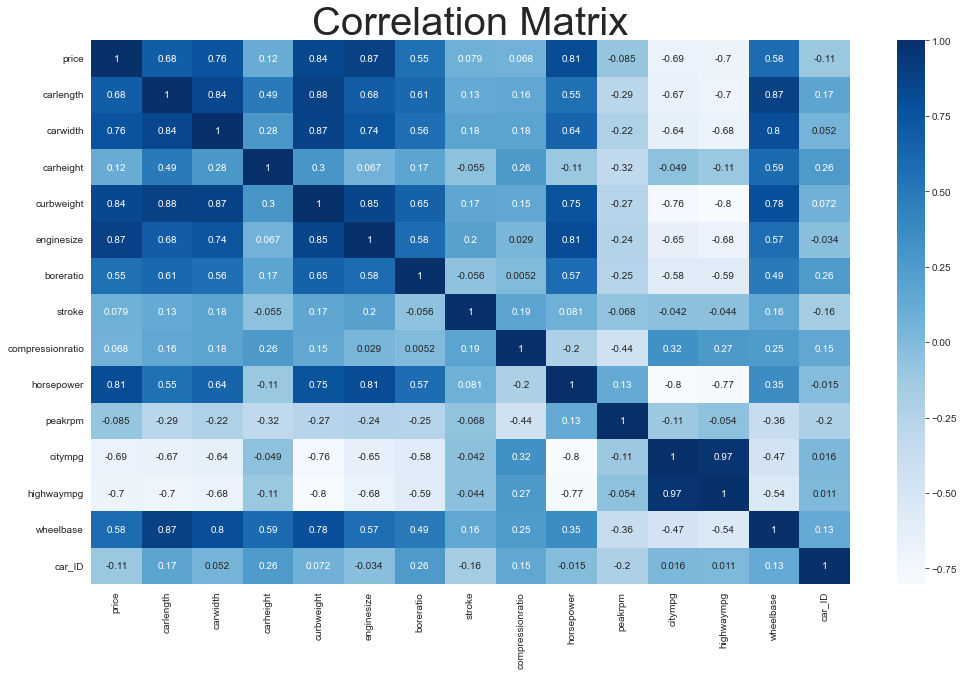

In [123]:
fig, ax = plt.subplots(figsize=(17,10))

ax.set_title('Correlation Matrix', fontsize=40)
sns.heatmap(corr_mat, cmap="Blues", annot=True)
plt.show()

# Visualize Target Variable

In [124]:
def plot_func1(df):
    fig, ax = plt.subplots(figsize=(15,8))
    ax.set_title('Price Histogram Distributions', fontsize=35)
    sns.histplot(df, x='price')
    plt.show()

    fig, ax = plt.subplots(figsize=(15.5,8))
    ax.set_title('Price Boxplot', fontsize=35)
    sns.boxplot(data=df, x='price')
    plt.show()

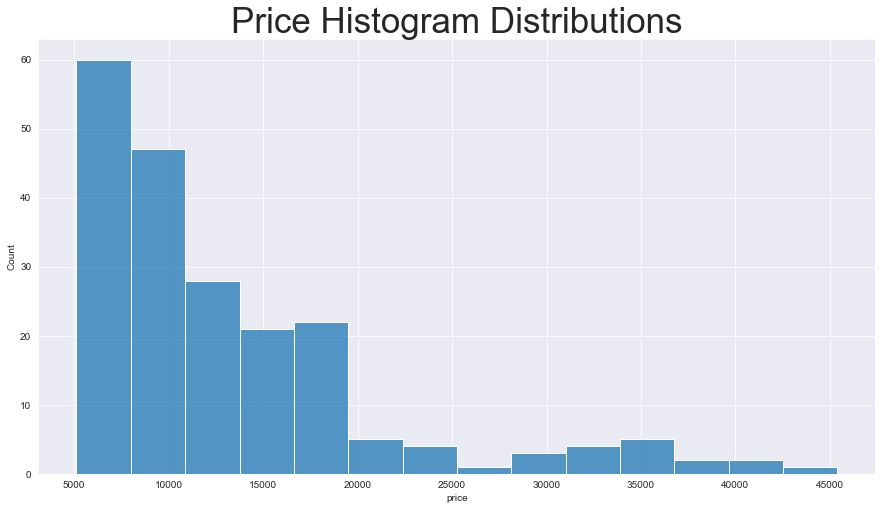

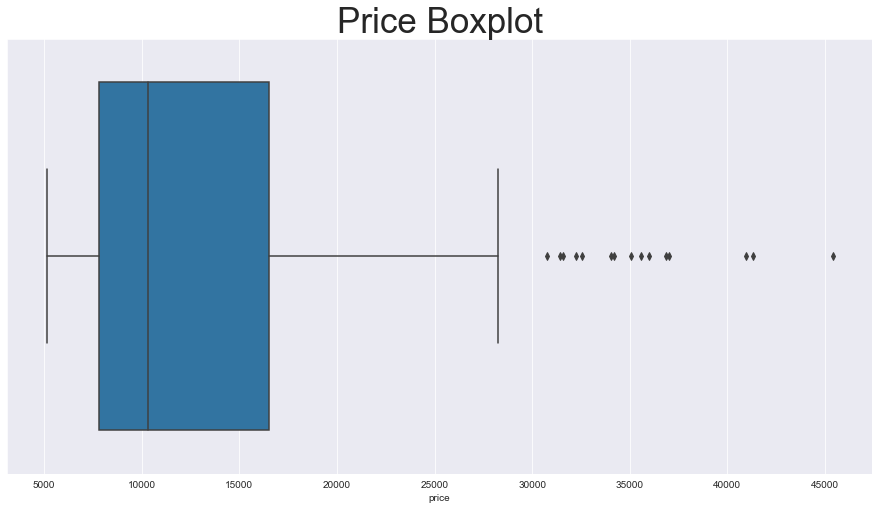

In [125]:
plot_func1(numeric_df)

#### Inspect the outliers for the Target Variable
* We have 15 records with prices much higher than the average of the sample; These records will be dropped.

In [126]:
numeric_df[numeric_df['price'] > 30000]

,price,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,wheelbase,car_ID
15,30760.000000,189.000000,66.900000,55.700000,3230,209,3.620000,3.390000,8.000000,182,5400,16,22,103.500000,16
16,41315.000000,193.800000,67.900000,53.700000,3380,209,3.620000,3.390000,8.000000,182,5400,16,22,103.500000,17
17,36880.000000,197.000000,70.900000,56.300000,3505,209,3.620000,3.390000,8.000000,182,5400,15,20,110.000000,18
47,32250.000000,199.600000,69.600000,52.800000,4066,258,3.630000,4.170000,8.100000,176,4750,15,19,113.000000,48
48,35550.000000,199.600000,69.600000,52.800000,4066,258,3.630000,4.170000,8.100000,176,4750,15,19,113.000000,49
49,36000.000000,191.700000,70.600000,47.800000,3950,326,3.540000,2.760000,11.500000,262,5000,13,17,102.000000,50
70,31600.000000,202.600000,71.700000,56.300000,3770,183,3.580000,3.640000,21.500000,123,4350,22,25,115.600000,71
71,34184.000000,202.600000,71.700000,56.500000,3740,234,3.460000,3.100000,8.300000,155,4750,16,18,115.600000,72
72,35056.000000,180.300000,70.500000,50.800000,3685,234,3.460000,3.100000,8.300000,155,4750,16,18,96.600000,73
73,40960.000000,208.100000,71.700000,56.700000,3900,308,3.800000,3.350000,8.000000,184,4500,14,16,120.900000,74


In [127]:
data = numeric_df[numeric_df['price'] < 25000].copy()

#### Re-evaluate Correlation Coefficients

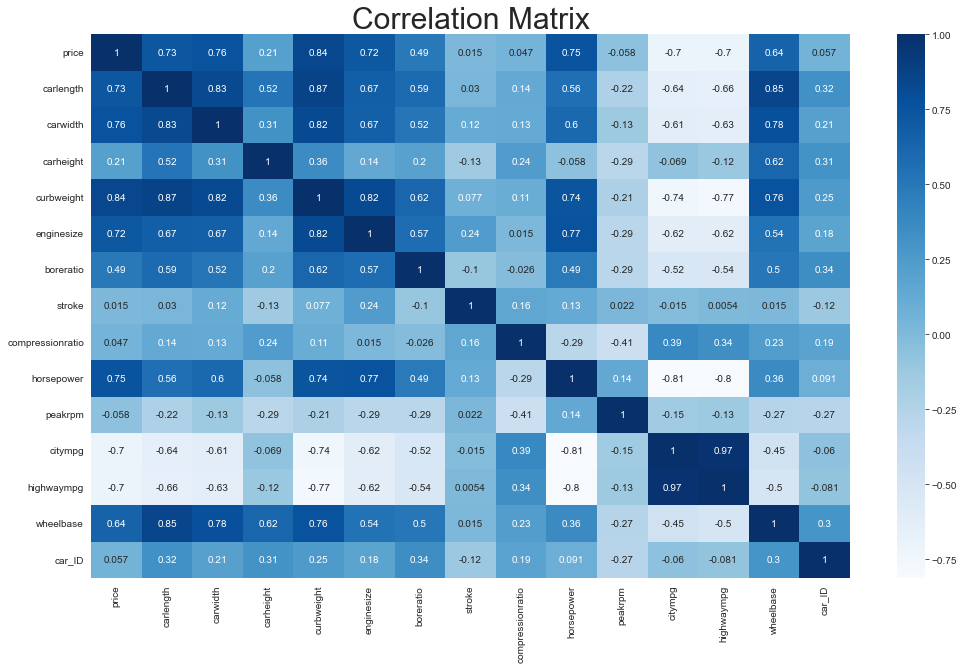

In [128]:
fig, ax = plt.subplots(figsize=(17,10))

corr_mat = data.corr()
sns.heatmap(corr_mat, cmap="Blues", annot=True)
ax.set_title('Correlation Matrix', fontsize=30)
plt.show()

### Linear Regression Model #1
* Predictor Variable: Curbweight
* Response Variable: City MPG

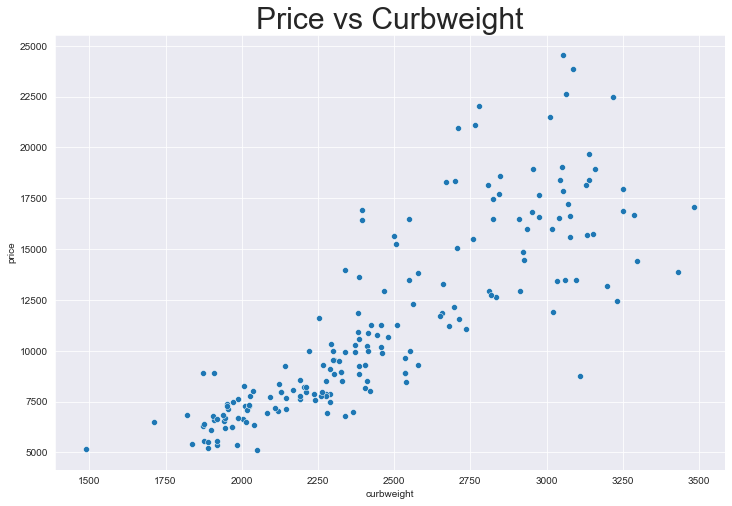

In [129]:
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(data=data, x='curbweight', y='price')
ax.set_title('Price vs Curbweight', fontsize=30)
plt.show()

In [130]:
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

model1 = sm.ols('price ~ curbweight', data=data).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     434.4
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           1.99e-50
Time:                        02:33:11   Log-Likelihood:                -1728.1
No. Observations:                 187   AIC:                             3460.
Df Residuals:                     185   BIC:                             3467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.089e+04   1078.175    -10.099      0.0

### Variable Inflation Factor

In [131]:
import statsmodels.api as sm2

X = data['curbweight']

# First, create a design matrix with your predictor variables
X_const = sm2.add_constant(X)

# Next, calculate the VIF for each predictor variable
vif = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Finally, attach the VIF values to the predictor variables and inspect the results
vif_df = pd.DataFrame({'variable': X_const.columns, 'VIF': vif})
print(vif_df)

     variable       VIF
0       const 34.539210
1  curbweight  1.000000


c:\Users\mmaje\anaconda3\envs\minimal_ds\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Assumptions of Linearity
### Residual Plot

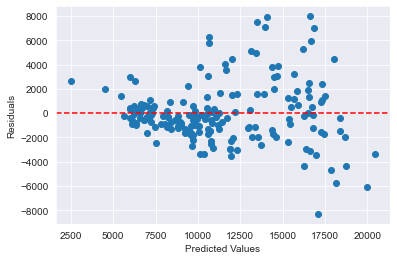

In [132]:
residuals = model1.resid
predicted_values = model1.predict(X)


plt.scatter(predicted_values, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="red", linestyle="--")
plt.show()

### QQ Residual Plots

c:\Users\mmaje\anaconda3\envs\minimal_ds\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


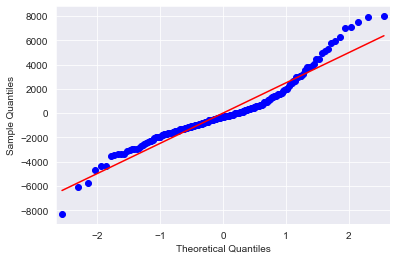

In [133]:
fig, ax = plt.subplots()
sm2.graphics.qqplot(residuals, line='s', ax=ax)
plt.show()

### Model #2
* Predictor Variables: Curbweight, carheight
* Target Variable: Price

In [134]:
model1 = sm.ols('price ~ curbweight + carheight', data=data).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     225.8
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           2.99e-50
Time:                        02:33:12   Log-Likelihood:                -1725.2
No. Observations:                 187   AIC:                             3456.
Df Residuals:                     184   BIC:                             3466.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1396.2650   4079.105     -0.342      0.7

### Model #3
* Predictor Variables: Curbweight, carheight, plus categorical variables
* Target Variable: Price

In [135]:
cat_data = raw_data[['car_ID','fueltype', 'aspiration', 'doornumber', 'carbody', 
                     'drivewheel', 'enginelocation', 'enginetype', 
                     'cylindernumber', 'fuelsystem']].copy()


cat_data.head()

,car_ID,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,2,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,3,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,4,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,5,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [136]:
numeric_df2 = numeric_df

data2 = pd.merge(numeric_df2, cat_data, on='car_ID').copy()
data2.head()

,price,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,wheelbase,car_ID,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,13495.000000,168.800000,64.100000,48.800000,2548,130,3.470000,2.680000,9.000000,111,5000,21,27,88.600000,1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,16500.000000,168.800000,64.100000,48.800000,2548,130,3.470000,2.680000,9.000000,111,5000,21,27,88.600000,2,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,16500.000000,171.200000,65.500000,52.400000,2823,152,2.680000,3.470000,9.000000,154,5000,19,26,94.500000,3,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,13950.000000,176.600000,66.200000,54.300000,2337,109,3.190000,3.400000,10.000000,102,5500,24,30,99.800000,4,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,17450.000000,176.600000,66.400000,54.300000,2824,136,3.190000,3.400000,8.000000,115,5500,18,22,99.400000,5,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [137]:
full_df = pd.get_dummies(data2)

full_df.head()

,price,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,wheelbase,car_ID,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,13495.000000,168.800000,64.100000,48.800000,2548,130,3.470000,2.680000,9.000000,111,5000,21,27,88.600000,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,16500.000000,168.800000,64.100000,48.800000,2548,130,3.470000,2.680000,9.000000,111,5000,21,27,88.600000,2,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,16500.000000,171.200000,65.500000,52.400000,2823,152,2.680000,3.470000,9.000000,154,5000,19,26,94.500000,3,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,13950.000000,176.600000,66.200000,54.300000,2337,109,3.190000,3.400000,10.000000,102,5500,24,30,99.800000,4,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,17450.000000,176.600000,66.400000,54.300000,2824,136,3.190000,3.400000,8.000000,115,5500,18,22,99.400000,5,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [138]:
full_df.columns

Index(['price', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'wheelbase', 'car_ID',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi

#### Model #3

In [139]:

model3 = sm.ols("""price ~ curbweight + carlength + carwidth + carheight + curbweight + enginesize + boreratio + stroke +
                     compressionratio + horsepower + peakrpm + citympg + highwaympg + wheelbase + C(fueltype_diesel) + C(fueltype_gas) +
                     C(aspiration_std) + C(aspiration_turbo) + C(doornumber_four) + C(doornumber_two) + C(carbody_convertible) + C(carbody_hardtop) + C(carbody_hatchback) +
                     C(carbody_sedan) + C(carbody_wagon) + C(drivewheel_4wd) + C(drivewheel_fwd) + C(drivewheel_rwd) + C(enginelocation_front) + C(enginelocation_rear) + 
                     C(enginetype_dohc) + C(enginetype_dohcv) + C(enginetype_l) + C(enginetype_ohc) + C(enginetype_ohcf) + C(enginetype_ohcv) + C(enginetype_rotor) + C(cylindernumber_eight) +
                     C(cylindernumber_five) + C(cylindernumber_four) + C(cylindernumber_six) + C(cylindernumber_three) + C(cylindernumber_twelve) + C(cylindernumber_two) + 
                     C(fuelsystem_1bbl) + C(fuelsystem_2bbl) + C(fuelsystem_4bbl) + C(fuelsystem_idi) + C(fuelsystem_mfi) + C(fuelsystem_mpfi) + C(fuelsystem_spdi) + C(fuelsystem_spfi) """, data=full_df).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     63.68
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           6.33e-81
Time:                        02:33:12   Log-Likelihood:                -1844.9
No. Observations:                 205   AIC:                             3772.
Df Residuals:                     164   BIC:                             3908.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -8487.9741   3697.040     -2.296      0.023   -1.58e+04   -1188.040
C(fueltype_diesel)[T.1]         876.6917   2869.806      0.305      0.760   -4789.840    6543.223
C(fueltype_gas)[T.1]          -9364.6658   2739.832     -3.418      0.001   -1.48e+04   -3954.773
C(aspiration_std)[T.1]        -5068.9520   1940.653     -2.612      0.010   -8900.839   -1237.065
C(aspiration_turbo)[T.1]      -3419.0221   1858.747     -1.839      0.068   -7089.183     251.139
C(doornumber_four)[T.1]       -4373.3567   1887.657     -2.317      0.022   -8100.601    -646.112
C(doornumber_two)[T.1]        -4114.6174   1847.961     -2.227      0.027   -7763.481    -465.754
C(carbody_convertible)[T.1]     704.6278   1056.543      0.667      0.506   -1381.553    2790.808
C(carbody_hardtop)[T.1]       -2527.0557   1110.825     -2.275      0.024   -4720.419    -333.693
C(carbody_hatchback)[T.1]     -2594.6917    906.405     -2.863      0.005   -4384.419    -804.964
C(carbody_sedan)[T.1]         -1477.6443    950.260     -1.555      0.122   -3353.965     398.676
C(carbody_wagon)[T.1]         -2593.2102   1081.935     -2.397      0.018   -4729.529    -456.891
C(drivewheel_4wd)[T.1]        -3176.7492   1305.875     -2.433      0.016   -5755.245    -598.254
C(drivewheel_fwd)[T.1]        -3115.2806   1410.296     -2.209      0.029   -5899.959    -330.602
C(drivewheel_rwd)[T.1]        -2195.9442   1361.272     -1.613      0.109   -4883.823     491.935
C(enginelocation_front)[T.1]  -8044.0337   2062.458     -3.900      0.000   -1.21e+04   -3971.640
C(enginelocation_rear)[T.1]    -443.9404   2393.808     -0.185      0.853   -5170.596    4282.715
C(enginetype_dohc)[T.1]        -149.8081   1151.108     -0.130      0.897   -2422.710    2123.094
C(enginetype_dohcv)[T.1]      -7592.8924   3972.367     -1.911      0.058   -1.54e+04     250.684
C(enginetype_l)[T.1]          -1071.9707   1597.020     -0.671      0.503   -4225.343    2081.401
C(enginetype_ohc)[T.1]         2957.3212   1109.924      2.664      0.008     765.739    5148.904
C(enginetype_ohcf)[T.1]        1068.8289   1349.600      0.792      0.430   -1596.002    3733.660
C(enginetype_ohcv)[T.1]       -5834.3735   1121.276     -5.203      0.000   -8048.371   -3620.376
C(enginetype_rotor)[T.1]       2134.9205   1384.170      1.542      0.125    -598.172    4868.013
C(cylindernumber_eight)[T.1]   4389.4448   2169.718      2.023      0.045     105.262    8673.628
C(cylindernumber_five)[T.1]   -4883.5564   1590.318     -3.071      0.002   -8023.695   -1743.418
C(cylindernumber_four)[T.1]   -5478.2373   1551.780     -3.530      0.001   -8542.280   -2414.194
C(cylindernumber_six)[T.1]    -2216.5619    921.121     -2.406      0.017   -4035.347    -397.777
C(cylindernumber_three)[T.1]   3872.5820   29

In [140]:
pd.options.display.float_format = '{:2f}'.format

model3.pvalues

Intercept                       0.022949
C(fueltype_diesel)[T.1]         0.760382
C(fueltype_gas)[T.1]            0.000796
C(aspiration_std)[T.1]          0.009838
C(aspiration_turbo)[T.1]        0.067661
C(doornumber_four)[T.1]         0.021750
C(doornumber_two)[T.1]          0.027338
C(carbody_convertible)[T.1]     0.505762
C(carbody_hardtop)[T.1]         0.024205
C(carbody_hatchback)[T.1]       0.004750
C(carbody_sedan)[T.1]           0.121876
C(carbody_wagon)[T.1]           0.017663
C(drivewheel_4wd)[T.1]          0.016063
C(drivewheel_fwd)[T.1]          0.028564
C(drivewheel_rwd)[T.1]          0.108633
C(enginelocation_front)[T.1]    0.000140
C(enginelocation_rear)[T.1]     0.853102
C(enginetype_dohc)[T.1]         0.896613
C(enginetype_dohcv)[T.1]        0.057694
C(enginetype_l)[T.1]            0.503017
C(enginetype_ohc)[T.1]          0.008482
C(enginetype_ohcf)[T.1]         0.429528
C(enginetype_ohcv)[T.1]         0.000001
C(enginetype_rotor)[T.1]        0.124908
C(cylindernumber

## Model #4
* Fine Tune Model #3
* Some of the variables have a p-value > .05. 
* These variables should be removed from the model.

In [141]:

model4 = sm.ols("""price ~ curbweight + carwidth + curbweight + enginesize + stroke + peakrpm + C(fueltype_gas) +
                           C(aspiration_std) + C(doornumber_four) + C(doornumber_two) + C(carbody_hardtop) + C(carbody_hatchback) +
                           C(carbody_wagon) + C(drivewheel_4wd) + C(drivewheel_fwd) + C(enginelocation_front) + 
                           C(enginetype_ohc) + C(enginetype_ohcv) + C(cylindernumber_eight) +
                           C(cylindernumber_five) + C(cylindernumber_four) + C(cylindernumber_six) + 
                           C(fuelsystem_spdi) """, data=full_df).fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     112.1
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           1.09e-92
Time:                        02:33:12   Log-Likelihood:                -1863.0
No. Observations:                 205   AIC:                             3770.
Df Residuals:                     183   BIC:                             3843.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -9151.6664   7476.054     -1.224      0.222   -2.39e+04    5598.677
C(fueltype_gas)[T.1]          -677.6229    749.360     -0.904      0.367   -2156.120     800.874
C(aspiration_std)[T.1]       -2058.9006    591.158     -3.483      0.001   -3225.262    -892.539
C(doornumber_four)[T.1]      -4809.1828   3784.631     -1.271      0.205   -1.23e+04    2657.940
C(doornumber_two)[T.1]       -4342.4836   3707.513     -1.171      0.243   -1.17e+04    2972.484
C(carbody_hardtop)[T.1]      -1496.7595   1008.401     -1.484      0.139   -3486.347     492.828
C(carbody_hatchback)[T.1]    -1266.3090    488.602     -2.592      0.010   -2230.326    -302.292
C(carbody_wagon)[T.1]        -1383.4010    569.461     -2.429      0.016   -2506.953    -259.849
C(drivewheel_4wd)[T.1]        -746.6566    947.282     -0.788      0.432   -2615.656    1122.343
C(drivewheel_fwd)[T.1]        -801.8798    569.845     -1.407      0.161   -1926.192     322.432
C(enginelocation_front)[T.1] -1.032e+04   1793.204     -5.756      0.000   -1.39e+04   -6783.434
C(enginetype_ohc)[T.1]        2961.7505    530.840      5.579      0.000    1914.396    4009.105
C(enginetype_ohcv)[T.1]      -5177.4462    981.498     -5.275      0.000   -7113.953   -3240.940
C(cylindernumber_eight)[T.1]  6153.3507   1755.574      3.505      0.001    2689.583    9617.118
C(cylindernumber_five)[T.1]  -4263.0187   1457.074     -2.926      0.004   -7137.843   -1388.194
C(cylindernumber_four)[T.1]  -6593.8556   1099.991     -5.994      0.000   -8764.150   -4423.561
C(cylindernumber_six)[T.1]   -1782.9412   1189.099     -1.499      0.135   -4129.047     563.165
C(fuelsystem_spdi)[T.1]      -1980.2645    948.503     -2.088      0.038   -3851.671    -108.858
curbweight                       4.0370      1.251      3.228      0.001       1.569       6.505
carwidth                       393.1434    191.090      2.057      0.041      16.120     770.167
enginesize                      90.9823     12.226      7.441      0.000      66.860     115.105
stroke                       -3657.8245    689.768     -5.303      0.000   -5018.746   -2296.903
peakrpm                          1.6538      0.456      3.629      0.000       0.755       2.553
==============================================================================
Omnibus:                       32.906   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.531
Skew:                           0.617   Prob(JB):                     8.97e-23
Kurtosis:                       6.219   Cond. No.                     3.30e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctl

## Model #5
* Removing the variables has changed some of the remaining p-values.
* Repeat the same process of eliminating variables that do not have significant p-values.

In [142]:
model5 = sm.ols("""price ~ curbweight + carwidth + enginesize + stroke + peakrpm +
                           C(aspiration_std) + C(carbody_hatchback) +
                           C(carbody_wagon) + C(enginelocation_front) + 
                           C(enginetype_ohc) + C(enginetype_ohcv) + C(cylindernumber_eight) +
                           C(cylindernumber_five) + C(cylindernumber_four) + 
                           C(fuelsystem_spdi) """, data=full_df).fit()

model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     153.6
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           3.83e-97
Time:                        02:33:13   Log-Likelihood:                -1868.0
No. Observations:                 205   AIC:                             3768.
Df Residuals:                     189   BIC:                             3821.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -1.579e+04   1.04e+04     -1.516      0.131   -3.63e+04    4753.713
C(aspiration_std)[T.1]       -2217.9695    564.807     -3.927      0.000   -3332.106   -1103.834
C(carbody_hatchback)[T.1]     -916.2030    381.238     -2.403      0.017   -1668.232    -164.174
C(carbody_wagon)[T.1]        -1690.5421    556.922     -3.036      0.003   -2789.123    -591.961
C(enginelocation_front)[T.1] -9503.6011   1649.879     -5.760      0.000   -1.28e+04   -6249.057
C(enginetype_ohc)[T.1]        2779.1998    522.908      5.315      0.000    1747.715    3810.685
C(enginetype_ohcv)[T.1]      -5649.1007    960.849     -5.879      0.000   -7544.466   -3753.736
C(cylindernumber_eight)[T.1]  7811.2885   1357.510      5.754      0.000    5133.470    1.05e+04
C(cylindernumber_five)[T.1]  -3353.5623   1049.821     -3.194      0.002   -5424.434   -1282.690
C(cylindernumber_four)[T.1]  -5622.8266    698.189     -8.053      0.000   -7000.071   -4245.582
C(fuelsystem_spdi)[T.1]      -2264.6930    926.989     -2.443      0.015   -4093.268    -436.118
curbweight                       4.9321      1.055      4.675      0.000       2.851       7.013
carwidth                       360.1132    179.754      2.003      0.047       5.531     714.695
enginesize                      83.8938     11.234      7.468      0.000      61.734     106.053
stroke                       -3681.6878    642.307     -5.732      0.000   -4948.700   -2414.676
peakrpm                          1.6714      0.384      4.349      0.000       0.913       2.430
==============================================================================
Omnibus:                       28.692   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.282
Skew:                           0.494   Prob(JB):                     3.36e-21
Kurtosis:                       6.172   Cond. No.                     3.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Variable Inflation Factor
* Create a new list of variable inflation factors.
    * Eliminate the variables with a VIF > 5

In [143]:
X = full_df[['curbweight', 'carwidth', 'enginesize', 'stroke', 'peakrpm', 'aspiration_std', 'carbody_hatchback',
             'carbody_wagon', 'enginelocation_front', 'enginetype_ohc', 'enginetype_ohcv', 'cylindernumber_eight',
             'cylindernumber_five', 'cylindernumber_four', 'fuelsystem_spdi']].copy()

# First, create a design matrix with your predictor variables
X_const = sm2.add_constant(X)

# Next, calculate the VIF for each predictor variable
vif = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Finally, attach the VIF values to the predictor variables and inspect the results
vif_df = pd.DataFrame({'variable': X_const.columns, 'VIF': vif})
print(vif_df)

                variable         VIF
0                  const 4257.109716
1             curbweight   11.788479
2               carwidth    5.809722
3             enginesize    8.550294
4                 stroke    1.585223
5                peakrpm    1.313259
6         aspiration_std    1.852630
7      carbody_hatchback    1.283222
8          carbody_wagon    1.304001
9   enginelocation_front    1.541183
10        enginetype_ohc    2.155081
11       enginetype_ohcv    2.152938
12  cylindernumber_eight    1.721724
13   cylindernumber_five    2.197365
14   cylindernumber_four    3.331029
15       fuelsystem_spdi    1.416202


c:\Users\mmaje\anaconda3\envs\minimal_ds\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Assumptions of Linearity
### Residual Plot

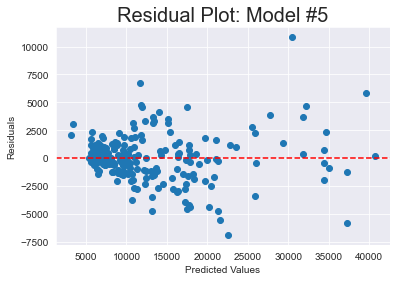

In [144]:
residuals5 = model5.resid
predicted_values5 = model5.predict(X)

fig, ax = plt.subplots()
ax.set_title('Residual Plot: Model #5', fontsize=20)
plt.scatter(predicted_values5, residuals5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="red", linestyle="--")
plt.show()

### QQ Residual Plots

c:\Users\mmaje\anaconda3\envs\minimal_ds\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


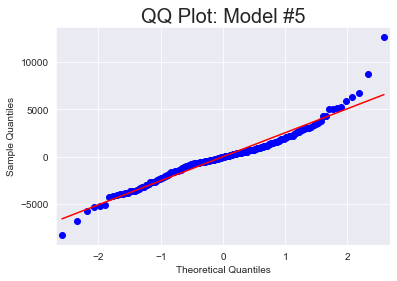

In [161]:
fig, ax = plt.subplots()

sm2.graphics.qqplot(residuals, line='s', ax=ax)
ax.set_title('QQ Plot: Model #5', fontsize=20)
plt.show()

## Model #6
* Run the model again without carwidth and enginesize

In [146]:
model6 = sm.ols("""price ~ stroke + peakrpm +
                           C(aspiration_std) + C(carbody_hatchback) +
                           C(carbody_wagon) + C(enginelocation_front) + 
                           C(enginetype_ohc) + C(enginetype_ohcv) + C(cylindernumber_eight) +
                           C(cylindernumber_five) + C(cylindernumber_four) + 
                           C(fuelsystem_spdi) """, data=full_df).fit()

model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     38.31
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           1.58e-44
Time:                        02:33:13   Log-Likelihood:                -2007.2
No. Observations:                 205   AIC:                             4040.
Df Residuals:                     192   BIC:                             4084.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     4.426e+04   6227.902      7.107      0.000     3.2e+04    5.65e+04
C(aspiration_std)[T.1]       -5165.0551    984.186     -5.248      0.000   -7106.260   -3223.850
C(carbody_hatchback)[T.1]    -3334.6491    713.691     -4.672      0.000   -4742.330   -1926.968
C(carbody_wagon)[T.1]         -901.2622   1013.552     -0.889      0.375   -2900.389    1097.864
C(enginelocation_front)[T.1] -1.317e+04   2890.917     -4.556      0.000   -1.89e+04   -7468.067
C(enginetype_ohc)[T.1]         657.6645    976.620      0.673      0.501   -1268.617    2583.946
C(enginetype_ohcv)[T.1]      -1644.1013   1741.126     -0.944      0.346   -5078.293    1790.090
C(cylindernumber_eight)[T.1]  1.704e+04   2338.525      7.286      0.000    1.24e+04    2.17e+04
C(cylindernumber_five)[T.1]  -3576.8070   1903.892     -1.879      0.062   -7332.037     178.423
C(cylindernumber_four)[T.1]   -1.19e+04   1241.049     -9.585      0.000   -1.43e+04   -9447.870
C(fuelsystem_spdi)[T.1]      -1824.7044   1779.692     -1.025      0.307   -5334.963    1685.554
stroke                         209.9099   1203.686      0.174      0.862   -2164.235    2584.055
peakrpm                         -0.8777      0.705     -1.244      0.215      -2.269       0.514
==============================================================================
Omnibus:                       49.094   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.807
Skew:                           1.105   Prob(JB):                     3.89e-24
Kurtosis:                       5.781   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Recalculate the VIF without enginesize and carlength
* The model performs much worse without the engine size, weight, and carwidth.
* Adding the best predictor, curbweight, back to the model may help improve the score.

In [147]:
X = full_df[['curbweight', 'stroke', 'peakrpm', 'aspiration_std', 'carbody_hatchback',
             'carbody_wagon', 'enginelocation_front', 'enginetype_ohc', 'enginetype_ohcv', 'cylindernumber_eight',
             'cylindernumber_five', 'cylindernumber_four', 'fuelsystem_spdi']].copy()

# First, create a design matrix with your predictor variables
X_const = sm2.add_constant(X)

# Next, calculate the VIF for each predictor variable
vif = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Finally, attach the VIF values to the predictor variables and inspect the results
vif_df = pd.DataFrame({'variable': X_const.columns, 'VIF': vif})
print(vif_df)

                variable        VIF
0                  const 513.355969
1             curbweight   2.715422
2                 stroke   1.522161
3                peakrpm   1.220969
4         aspiration_std   1.680142
5      carbody_hatchback   1.277945
6          carbody_wagon   1.167346
7   enginelocation_front   1.238203
8         enginetype_ohc   2.091999
9        enginetype_ohcv   1.856734
10  cylindernumber_eight   1.393984
11   cylindernumber_five   1.888794
12   cylindernumber_four   3.207683
13       fuelsystem_spdi   1.364499


c:\Users\mmaje\anaconda3\envs\minimal_ds\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Model #7
* Using the variables from Model #5, remove carwidth and engine size from the model

In [148]:
model7 = sm.ols("""price ~ curbweight + stroke + peakrpm +
                           C(aspiration_std) + C(carbody_hatchback) +
                           C(carbody_wagon) + C(enginelocation_front) + 
                           C(enginetype_ohc) + C(enginetype_ohcv) + C(cylindernumber_eight) +
                           C(cylindernumber_five) + C(cylindernumber_four) + 
                           C(fuelsystem_spdi) """, data=full_df).fit()

model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     133.0
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           3.47e-88
Time:                        02:33:13   Log-Likelihood:                -1895.9
No. Observations:                 205   AIC:                             3820.
Df Residuals:                     191   BIC:                             3866.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     6453.9523   4120.497      1.566      0.119   -1673.571    1.46e+04
C(aspiration_std)[T.1]        -970.6847    612.931     -1.584      0.115   -2179.668     238.299
C(carbody_hatchback)[T.1]     -956.4030    433.545     -2.206      0.029   -1811.554    -101.252
C(carbody_wagon)[T.1]        -3013.9909    600.465     -5.019      0.000   -4198.385   -1829.596
C(enginelocation_front)[T.1] -1.432e+04   1685.209     -8.499      0.000   -1.76e+04    -1.1e+04
C(enginetype_ohc)[T.1]        3461.3033    587.093      5.896      0.000    2303.286    4619.321
C(enginetype_ohcv)[T.1]      -3023.8953   1016.826     -2.974      0.003   -5029.546   -1018.245
C(cylindernumber_eight)[T.1]  1.151e+04   1391.948      8.271      0.000    8766.793    1.43e+04
C(cylindernumber_five)[T.1]  -3558.2590   1109.147     -3.208      0.002   -5746.010   -1370.508
C(cylindernumber_four)[T.1]  -6190.8965    780.751     -7.929      0.000   -7730.898   -4650.895
C(fuelsystem_spdi)[T.1]      -1553.0535   1036.887     -1.498      0.136   -3598.273     492.167
curbweight                      11.1688      0.577     19.358      0.000      10.031      12.307
stroke                       -2706.7805    717.234     -3.774      0.000   -4121.496   -1292.065
peakrpm                          1.0084      0.422      2.388      0.018       0.175       1.841
==============================================================================
Omnibus:                       39.125   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.960
Skew:                           0.715   Prob(JB):                     8.14e-30
Kurtosis:                       6.693   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model #8
* Run the model without Fuelsystem spdi 
    * (1 of 2 variables with p-value > .05)

In [162]:
model8 = sm.ols("""price ~ curbweight + stroke + peakrpm +
                           C(aspiration_std) + C(carbody_hatchback) +
                           C(carbody_wagon) + C(enginelocation_front) + 
                           C(enginetype_ohc) + C(enginetype_ohcv) + C(cylindernumber_eight) +
                           C(cylindernumber_five) + C(cylindernumber_four) """, data=full_df).fit()

model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     143.0
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           8.59e-89
Time:                        02:39:01   Log-Likelihood:                -1897.1
No. Observations:                 205   AIC:                             3820.
Df Residuals:                     192   BIC:                             3863.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     7058.5734   4113.933      1.716      0.088   -1055.733    1.52e+04
C(aspiration_std)[T.1]        -618.7882    567.946     -1.090      0.277   -1739.002     501.426
C(carbody_hatchback)[T.1]    -1048.9223    430.509     -2.436      0.016   -1898.058    -199.787
C(carbody_wagon)[T.1]        -3010.0369    602.400     -4.997      0.000   -4198.209   -1821.864
C(enginelocation_front)[T.1] -1.422e+04   1689.221     -8.418      0.000   -1.76e+04   -1.09e+04
C(enginetype_ohc)[T.1]        3396.2196    587.375      5.782      0.000    2237.683    4554.756
C(enginetype_ohcv)[T.1]      -3074.9567   1019.540     -3.016      0.003   -5085.893   -1064.020
C(cylindernumber_eight)[T.1]  1.142e+04   1395.045      8.185      0.000    8667.335    1.42e+04
C(cylindernumber_five)[T.1]  -3372.1907   1105.731     -3.050      0.003   -5553.131   -1191.250
C(cylindernumber_four)[T.1]  -6238.3699    782.629     -7.971      0.000   -7782.025   -4694.715
curbweight                      11.1805      0.579     19.317      0.000      10.039      12.322
stroke                       -2875.3015    710.644     -4.046      0.000   -4276.973   -1473.630
peakrpm                          0.9236      0.420      2.200      0.029       0.095       1.752
==============================================================================
Omnibus:                       38.077   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.137
Skew:                           0.705   Prob(JB):                     4.07e-28
Kurtosis:                       6.575   Cond. No.                     1.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model #9
* Run the model without Aspiration_std
    * 2nd variable with p-value > .05 

In [163]:
model9 = sm.ols("""price ~ curbweight + stroke + peakrpm + C(carbody_hatchback) +
                           C(carbody_wagon) + C(enginelocation_front) + 
                           C(enginetype_ohc) + C(enginetype_ohcv) + C(cylindernumber_eight) +
                           C(cylindernumber_five) + C(cylindernumber_four) """, data=full_df).fit()

model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     155.7
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           1.21e-89
Time:                        02:39:58   Log-Likelihood:                -1897.7
No. Observations:                 205   AIC:                             3819.
Df Residuals:                     193   BIC:                             3859.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     5552.5734   3876.642      1.432      0.154   -2093.450    1.32e+04
C(carbody_hatchback)[T.1]     -973.1552    425.061     -2.289      0.023   -1811.517    -134.793
C(carbody_wagon)[T.1]        -3065.4626    600.539     -5.105      0.000   -4249.926   -1881.000
C(enginelocation_front)[T.1] -1.431e+04   1688.102     -8.475      0.000   -1.76e+04    -1.1e+04
C(enginetype_ohc)[T.1]        3315.1106    582.921      5.687      0.000    2165.398    4464.823
C(enginetype_ohcv)[T.1]      -3101.9050   1019.734     -3.042      0.003   -5113.158   -1090.652
C(cylindernumber_eight)[T.1]  1.123e+04   1384.889      8.109      0.000    8498.464     1.4e+04
C(cylindernumber_five)[T.1]  -3046.7952   1065.149     -2.860      0.005   -5147.623    -945.967
C(cylindernumber_four)[T.1]  -5966.1656    742.039     -8.040      0.000   -7429.713   -4502.618
curbweight                      11.4184      0.536     21.291      0.000      10.361      12.476
stroke                       -2743.8312    700.663     -3.916      0.000   -4125.772   -1361.891
peakrpm                          0.8976      0.419      2.140      0.034       0.070       1.725
==============================================================================
Omnibus:                       35.080   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.996
Skew:                           0.640   Prob(JB):                     6.48e-26
Kurtosis:                       6.456   Cond. No.                     1.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumptions of Linearity: Model #9
### Residual Plot

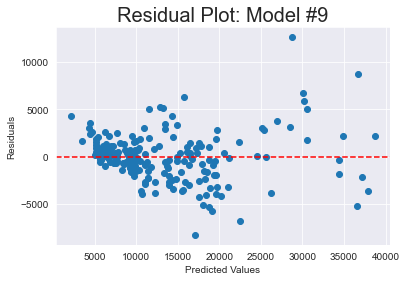

In [164]:
residuals9 = model9.resid
predicted_values9 = model9.predict(X)

fig, ax = plt.subplots()
ax.set_title('Residual Plot: Model #9', fontsize=20)
plt.scatter(predicted_values9, residuals9)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="red", linestyle="--")
plt.show()

### QQ Residual Plots

c:\Users\mmaje\anaconda3\envs\minimal_ds\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


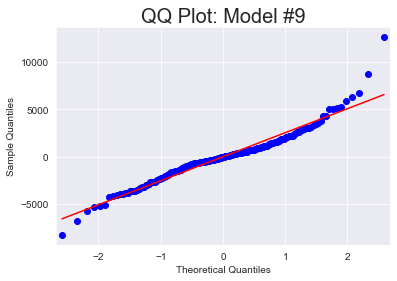

In [166]:
fig, ax = plt.subplots()
sm2.graphics.qqplot(residuals9, line='s', ax=ax)
ax.set_title('QQ Plot: Model #9', fontsize=20)
plt.show()

## Model Analysis:
### Model #9 Performs well, but the residual plot fails the assumption of homoescasticity. Additionally, the QQ plot has a large tail of what appears to be outliers. Further testing and modeling will have to be done to examine and correct these issues, resulting in a more accurate model.
* Curbweight has the strongest correlation with Price
    * Slight Multicollinearity exists between cylinder_four and curbweight. Model performance may be imporved by dropping this variable from the model.


## Check for multicollinearity in the data

In [153]:
chk_data = full_df[["price", "curbweight", "stroke", "peakrpm", "carbody_hatchback", "carbody_wagon", "enginelocation_front", "enginetype_ohc", "enginetype_ohcv",
                    "cylindernumber_eight", "cylindernumber_five", "cylindernumber_four"]].copy()


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

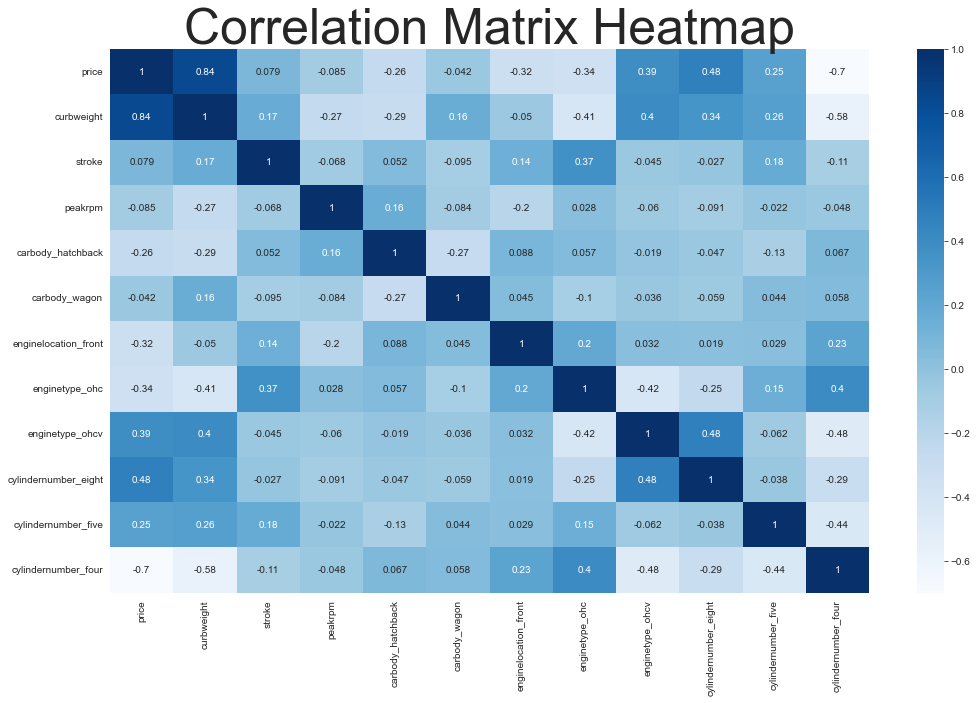

In [154]:
fig, ax = plt.subplots(figsize=(17,10))
cor_mat = chk_data.corr()
sns.heatmap(cor_mat, cmap='Blues', annot=True)
ax.set_title('Correlation Matrix Heatmap', fontsize=50)

## Create new target:
* The target variable is left skewed meaning there are fewer cars with higher prices in the data.
    * A log transformation will help ensure an even distribution of the target variable.
* price_log = natural log of (price)

In [155]:
full_df['price_log'] = np.log(full_df['price'])

## Model # 10: Transformed Target Variable
* After transforming the target variable, cylindernumber_five's p-value rose above .05
    * This variable is removed from this model

In [199]:
model10 = sm.ols("""price_log ~ curbweight + stroke + peakrpm + C(carbody_hatchback) +
                           C(carbody_wagon) + C(enginelocation_front) + 
                           C(enginetype_ohc) + C(enginetype_ohcv) + C(cylindernumber_eight) +
                           C(cylindernumber_four) """, data=full_df).fit()

model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           2.06e-93
Time:                        13:50:06   Log-Likelihood:                 91.347
No. Observations:                 205   AIC:                            -160.7
Df Residuals:                     194   BIC:                            -124.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        7.9511      0.236     33.654      0.000       7.485       8.417
C(carbody_hatchback)[T.1]       -0.0617      0.026     -2.389      0.018      -0.113      -0.011
C(carbody_wagon)[T.1]           -0.2024      0.037     -5.541      0.000      -0.274      -0.130
C(enginelocation_front)[T.1]    -0.6656      0.101     -6.570      0.000      -0.865      -0.466
C(enginetype_ohc)[T.1]           0.1370      0.034      4.082      0.000       0.071       0.203
C(enginetype_ohcv)[T.1]         -0.1476      0.060     -2.468      0.014      -0.266      -0.030
C(cylindernumber_eight)[T.1]     0.2486      0.084      2.955      0.004       0.083       0.415
C(cylindernumber_four)[T.1]     -0.2201      0.038     -5.822      0.000      -0.295      -0.146
curbweight                       0.0008   3.25e-05     26.153      0.000       0.001       0.001
stroke                          -0.1562      0.043     -3.673      0.000      -0.240      -0.072
peakrpm                          0.0001   2.56e-05      3.959      0.000    5.08e-05       0.000
==============================================================================
Omnibus:                        5.711   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                6.844
Skew:                           0.206   Prob(JB):                       0.0326
Kurtosis:                       3.794   Cond. No.                     1.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Compare Residual plots: Model #9 vs Model #10
* The log transformation corrected the heteroscedasticity. Now the variance is constant.

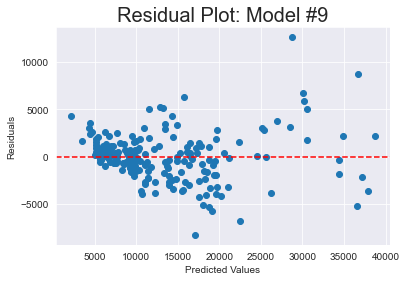

In [200]:
residuals9 = model9.resid
predicted_values9 = model9.predict(X)

fig, ax = plt.subplots()

ax.set_title('Residual Plot: Model #9', fontsize=20)
plt.scatter(predicted_values9, residuals9)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="red", linestyle="--")
plt.show()

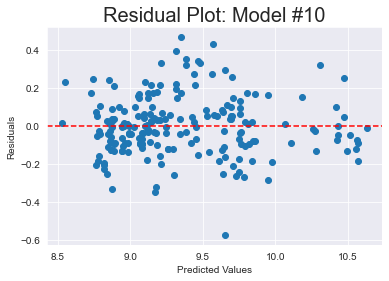

In [201]:
residuals10 = model10.resid
predicted_values10 = model10.predict(X)

fig, ax = plt.subplots()

ax.set_title('Residual Plot: Model #10', fontsize=20)
plt.scatter(predicted_values10, residuals10)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="red", linestyle="--")
plt.show()

## Compare QQ plots: Model #9 vs Model #10
* The log tranformation corrected the skewed tail.

c:\Users\mmaje\anaconda3\envs\minimal_ds\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


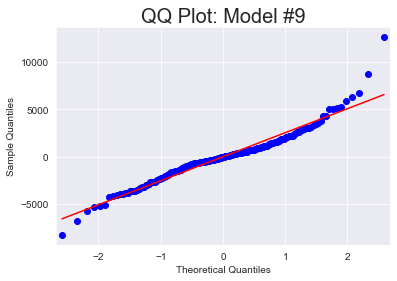

In [170]:
fig, ax = plt.subplots()

ax.set_title('QQ Plot: Model #9', fontsize=20)
sm2.graphics.qqplot(residuals9, line='s', ax=ax)
plt.show()

c:\Users\mmaje\anaconda3\envs\minimal_ds\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


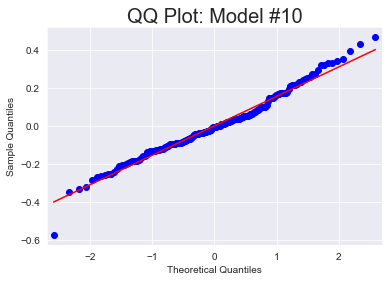

In [202]:
fig, ax = plt.subplots()

ax.set_title('QQ Plot: Model #10', fontsize=20)
sm2.graphics.qqplot(residuals10, line='s', ax=ax)
plt.show()

## Model #10 is the best performing model.
## R-Squared: 91%
## Attributes used to predict the price:
    * Weight of the Car
    * Stroke of the engine
    * Peak RPM of the engine
    * Car Body Type (Wagon, Hatchback, other)
    * Location of the engine (Front, other)
    * Number of cylinders in the engine
    * Type of Engine (ohc, ohcv, other)

In [203]:
coef_df = pd.DataFrame(model10.params).reset_index()
coef_df.columns = ['Parameter', 'Coef']
coef_df

,Parameter,Coef
0,Intercept,7.951085
1,C(carbody_hatchback)[T.1],-0.061742
2,C(carbody_wagon)[T.1],-0.202423
3,C(enginelocation_front)[T.1],-0.665617
4,C(enginetype_ohc)[T.1],0.136961
5,C(enginetype_ohcv)[T.1],-0.147573
6,C(cylindernumber_eight)[T.1],0.248609
7,C(cylindernumber_four)[T.1],-0.220117
8,curbweight,0.000849
9,stroke,-0.156218


In [204]:
coef_df['Coef_inv'] = np.exp(coef_df['Coef'])
coef_df

,Parameter,Coef,Coef_inv
0,Intercept,7.951085,2838.653750
1,C(carbody_hatchback)[T.1],-0.061742,0.940126
2,C(carbody_wagon)[T.1],-0.202423,0.816749
3,C(enginelocation_front)[T.1],-0.665617,0.513956
4,C(enginetype_ohc)[T.1],0.136961,1.146783
5,C(enginetype_ohcv)[T.1],-0.147573,0.862800
6,C(cylindernumber_eight)[T.1],0.248609,1.282241
7,C(cylindernumber_four)[T.1],-0.220117,0.802425
8,curbweight,0.000849,1.000850
9,stroke,-0.156218,0.855372


# Future Project Ideas:
* Attempt to simplify the model by removing the variables with data that may be hard to collect:
    * Peakrpm
    * Stroke
    * Engine ohc & Engine ohcv